**Problem 1A**

 **3.1**

Task 1

In [1]:
import pandas as pd
import numpy as np

# Loads the dataset
df = pd.read_csv("/content/drive/MyDrive/Human_Development_Index_Dataset.csv", encoding='latin1')



# to identify the unique years
df['year'].unique()

# to filter the dataset from year 2022
hdi_2022_df = df[df['year'] == 2022].copy()

Task 2

In [2]:
# to display the first 10 rows of the dataset
hdi_2022_df.head(10)

#  to count the number of rows and columns
num_rows, num_cols = hdi_2022_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# to list all column names
print("Column Names:", hdi_2022_df.columns.tolist())

# to list data types of each columns
print("Data Types:\n", hdi_2022_df.dtypes)


Number of rows: 206
Number of columns: 30
Column Names: ['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']
Data Types:
 Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f            

Task 3

In [3]:


# to check missing values in each column
missing_counts = hdi_2022_df.isna().sum()
print("Missing values per column:\n", missing_counts)

# to replace symbols/other characters with nan
hdi_2022_df.replace("–", np.nan, inplace=True)

# to identify numeric columns
numeric_columns = ['hdi', 'life_expectancy', 'gross_inc_percap']
for col in numeric_columns:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

# check for duplicates
duplicate_rows = hdi_2022_df[hdi_2022_df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

# to reemove duplicate rows
hdi_2022_df.drop_duplicates(inplace=True)

# to check for inconsistent country names and strip extra spaces
hdi_2022_df['country'] = hdi_2022_df['country'].str.strip()

# to handle missing values
# HDI is the primary variable of analysis, so rows missing HDI are dropped
hdi_2022_df.dropna(subset=['hdi'], inplace=True)

for col in ['life_expectancy', 'gross_inc_percap']:
    hdi_2022_df[col].fillna(hdi_2022_df[col].mean(), inplace=True)

print("Missing values after cleaning:\n", hdi_2022_df.isna().sum())
print("Dataset shape after cleaning:", hdi_2022_df.shape)


Missing values per column:
 Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64

/tmp/ipython-input-1203076430.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hdi_2022_df[col].fillna(hdi_2022_df[col].mean(), inplace=True)


Task 4

In [4]:
# Mean, Median and Standard Deviation of HDI
hdi_mean = hdi_2022_df['hdi'].mean()
hdi_median = hdi_2022_df['hdi'].median()
hdi_std = hdi_2022_df['hdi'].std()

print(f"Mean HDI (2022): {hdi_mean:.3f}")
print(f"Median HDI (2022): {hdi_median:.3f}")
print(f"Standard Deviation of HDI (2022): {hdi_std:.3f}")

# Country with highest HDI
max_hdi_row = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
print(f"Country with the Highest HDI (2022): {max_hdi_row['country']}, with the HDI: {max_hdi_row['hdi']:.3f}")

# Country with lowest HDI
min_hdi_row = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]
print(f"Country with the Lowest HDI (2022): {min_hdi_row['country']}, with the HDI: {min_hdi_row['hdi']:.3f}")


Mean HDI (2022): 0.723
Median HDI (2022): 0.740
Standard Deviation of HDI (2022): 0.153
Country with the Highest HDI (2022): Switzerland, with the HDI: 0.967
Country with the Lowest HDI (2022): Somalia, with the HDI: 0.380


Task 5

In [5]:
# filtering countries with HDI > 0.800
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

# sort by Gross National Income per Capita in descending order
high_hdi_sorted = high_hdi_df.sort_values(by='gross_inc_percap', ascending=False)

# display top 10 countries
top_10_countries = high_hdi_sorted.head(10)
print(top_10_countries[['country', 'hdi', 'gross_inc_percap']])


                     country    hdi  gross_inc_percap
3332           Liechtenstein  0.942      146673.24150
4718                   Qatar  0.875       95944.37754
5213               Singapore  0.949       88761.14559
2705                 Ireland  0.950       87467.51391
3398              Luxembourg  0.927       78554.23640
6104    United Arab Emirates  0.937       74103.71494
5609             Switzerland  0.967       69432.78669
4322                  Norway  0.966       69189.76165
6170           United States  0.927       65564.93798
2474  Hong Kong, China (SAR)  0.956       62485.50516


Task 6

In [6]:
# Function to classify HDI
def classify_hdi(hdi_value):
    if hdi_value < 0.550:
        return 'Low'
    elif 0.550 <= hdi_value <= 0.699:
        return 'Medium'
    elif 0.700 <= hdi_value <= 0.799:
        return 'High'
    else:  # hdi >= 0.800
        return 'Very High'

# applying the function to create new column
hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(classify_hdi)

# for verifying that all countries are classified correctly
print(hdi_2022_df[['country', 'hdi', 'HDI_Category']].head(15))

# to save the updated dataframe
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


                 country    hdi HDI_Category
32           Afghanistan  0.462          Low
65               Albania  0.789         High
98               Algeria  0.745         High
131              Andorra  0.884    Very High
164               Angola  0.591       Medium
197  Antigua and Barbuda  0.826    Very High
230            Argentina  0.849    Very High
263              Armenia  0.786         High
296            Australia  0.946    Very High
329              Austria  0.926    Very High
362           Azerbaijan  0.760         High
395              Bahamas  0.820    Very High
428              Bahrain  0.888    Very High
461           Bangladesh  0.670       Medium
494             Barbados  0.809    Very High


**Problem 1B**

**3.2**

Task 1

In [7]:
# filtering dataset for years 2020, 2021, 2022
years_of_interest = [2020, 2021, 2022]
hdi_2020_2022_df = df[df['year'].isin(years_of_interest)]

# check the first few rows to verify
print(hdi_2020_2022_df.head())

# save the filtered dataset for later tasks
hdi_2020_2022_df.to_csv("HDI_problem1B.csv", index=False)


    Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
30          31  AFG  Afghanistan  2020  0.488           62.575     38.972231   
31          32  AFG  Afghanistan  2021  0.473           61.982     40.099462   
32          33  AFG  Afghanistan  2022  0.462           62.879     41.128771   
63          64  ALB      Albania  2020  0.784           76.989      2.866849   
64          65  ALB      Albania  2021  0.785           76.463      2.854710   

       hdi_f     hdi_m  life_expec_f  ...  gender_development  \
30  0.381373  0.548741        65.432  ...               0.695   
31  0.379129  0.528559        65.279  ...               0.717   
32  0.332443  0.534145        66.213  ...               0.622   
63  0.775404  0.793220        79.676  ...               0.978   
64  0.777866  0.792942        79.173  ...               0.981   

    gender_inequality  secondary_education_f_%  secondary_education_m_%  \
30              0.674                 6.092345       

Task 2

In [8]:
# Essential columns to check
essential_cols = ['hdi', 'country', 'year']

#  check missing values in essential columns
missing_essential = hdi_2020_2022_df[essential_cols].isnull().sum()
print("Missing values in essential columns:\n", missing_essential)

# remove rows with missing essential values (cannot impute missing country/year)
hdi_2020_2022_df = hdi_2020_2022_df.dropna(subset=essential_cols)

# check for duplicate rows
duplicate_rows = hdi_2020_2022_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# remove duplicates if any
hdi_2020_2022_df = hdi_2020_2022_df.drop_duplicates()

# check numeric columns for non-numeric values (like '–' or text)
numeric_cols = ['hdi', 'life_expectancy', 'pop_millions', 'gross_inc_percap']

for col in numeric_cols:
    # convert to numeric, coerce errors (non-numeric → NaN)
    hdi_2020_2022_df[col] = pd.to_numeric(hdi_2020_2022_df[col], errors='coerce')

#  handle newly introduced NaNs after coercion

for col in numeric_cols:
    if hdi_2020_2022_df[col].isnull().sum() > 0:
        hdi_2020_2022_df[col].fillna(hdi_2020_2022_df[col].mean(), inplace=True)

# stripping the whitespaces
hdi_2020_2022_df['country'] = hdi_2020_2022_df['country'].str.strip()

# verifying year column as interger
hdi_2020_2022_df['year'] = hdi_2020_2022_df['year'].astype(int)

# 8. verify cleaning
print("Missing values after cleaning:\n", hdi_2020_2022_df.isnull().sum())
print("Dataset shape after cleaning:", hdi_2020_2022_df.shape)


Missing values in essential columns:
 hdi        8
country    0
year       0
dtype: int64
Number of duplicate rows: 0
Missing values after cleaning:
 Unnamed: 0                     0
iso3                           0
country                        0
year                           0
hdi                            0
life_expectancy                0
pop_millions                   0
hdi_f                         33
hdi_m                         33
life_expec_f                   0
life_expec_m                   0
expec_yr_school                0
expec_yr_school_f              0
expec_yr_school_m              0
mean_yr_school                 0
mean_yr_school_f               0
mean_yr_school_m               0
gross_inc_percap               0
gross_inc_percap_f            33
gross_inc_percap_m            33
gender_development            33
gender_inequality             81
secondary_education_f_%       45
secondary_education_m_%       45
seats_in_parliament_f_%        6
seats_in_parliament_m_%  

Task 3A




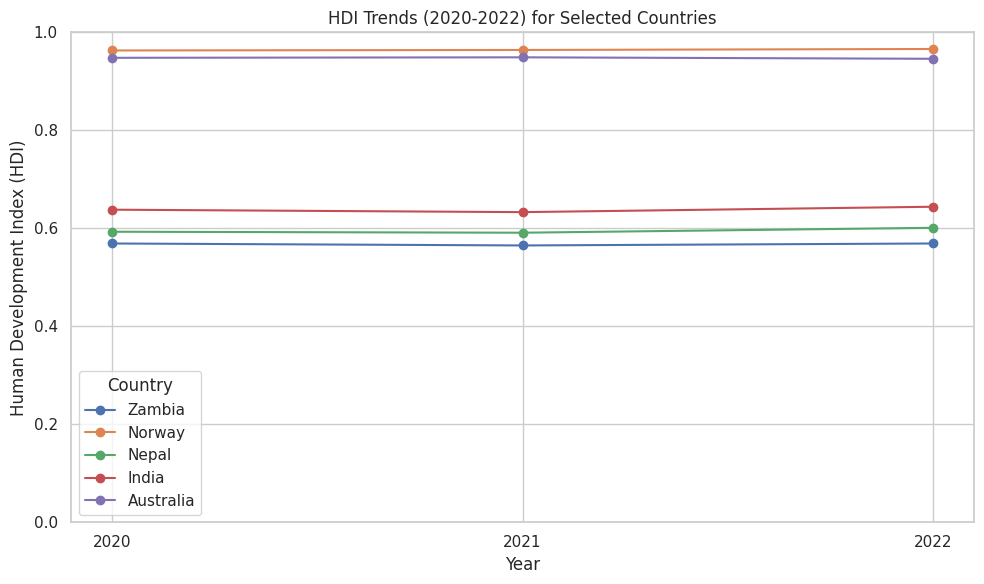

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# set Seaborn style
sns.set(style="whitegrid")

# select five countries
countries_to_plot = ['Zambia', 'Norway', 'Nepal', 'India', 'Australia']

# filter dataset for these countries
linechart_df = hdi_2020_2022_df[hdi_2020_2022_df['country'].isin(countries_to_plot)]

# plot HDI trend line chart
plt.figure(figsize=(10,6))

for country in countries_to_plot:
    country_data = linechart_df[linechart_df['country'] == country]
    plt.plot(country_data['year'], country_data['hdi'], marker='o', label=country)

# customize plot
plt.title("HDI Trends (2020-2022) for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Human Development Index (HDI)")
plt.xticks([2020, 2021, 2022])
plt.ylim(0, 1)
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()

# show plot
plt.show()


Task 3B

In [10]:
problem1b_df = hdi_2020_2022_df.copy()

Bar Chart

In [11]:
if 'region' in problem1b_df.columns:
    avg_reg_year = problem1b_df.groupby(['region', 'year'], as_index=False)['hdi'].mean()
    plt.figure(figsize=(10, 5))
    sns.barplot(data=avg_reg_year, x='region', y='hdi', hue='year')
    plt.title("Average HDI by region and year (2020–2022)")
    plt.xlabel("Region")
    plt.ylabel("Average HDI")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print("Interpretation: Compares regional averages across years, highlighting which regions lead and whether gaps widen or narrow.")
else:
    print("Region column not available; cannot compute average HDI by region.")

Region column not available; cannot compute average HDI by region.


Box plot

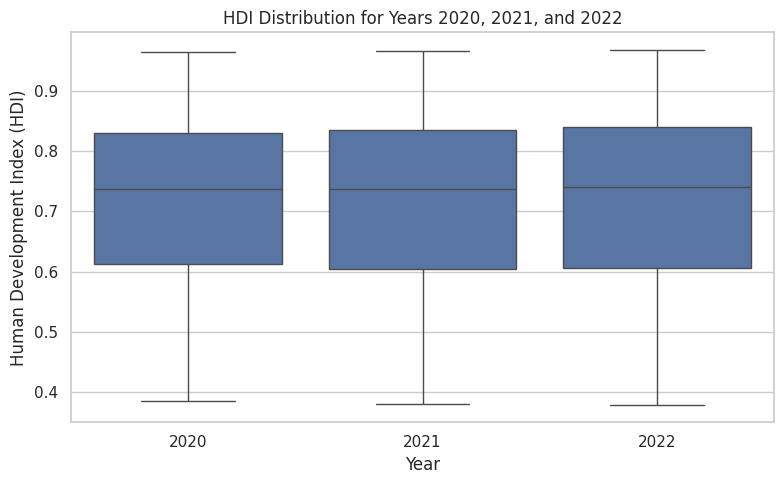

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for years 2020, 2021, 2022
hdi_2020_2022 = problem1b_df[problem1b_df['year'].isin([2020, 2021, 2022])]

# Create box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=hdi_2020_2022, x='year', y='hdi')

plt.title("HDI Distribution for Years 2020, 2021, and 2022")
plt.xlabel("Year")
plt.ylabel("Human Development Index (HDI)")
plt.tight_layout()
plt.show()


Scatter plot

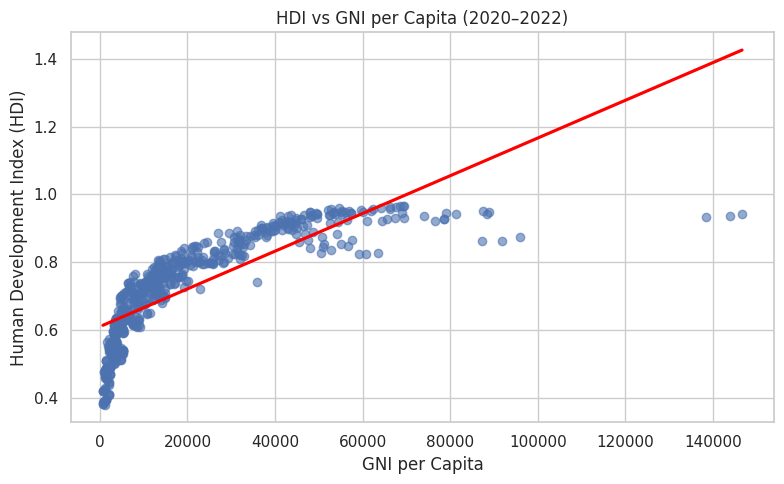

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if GNI per Capita column exists
if 'gross_inc_percap' in problem1b_df.columns:

    plt.figure(figsize=(8, 5))

    sns.regplot(
        data=problem1b_df,
        x='gross_inc_percap',
        y='hdi',
        ci = None,
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )

    plt.title("HDI vs GNI per Capita (2020–2022)")
    plt.xlabel("GNI per Capita")
    plt.ylabel("Human Development Index (HDI)")
    plt.tight_layout()
    plt.show()

else:
    print("GNI per Capita variable not available in the dataset.")


**Problem 2**

Task 1

In [14]:
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_df = df[df['country'].isin(south_asia_countries)].copy()
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)
south_asia = df[df['country'].isin(south_asia_countries)]
south_asia.to_csv('HDI_SouthAsia.csv', index=False)





Task 2

In [15]:
south_asia['country'].unique() # Checking countries

array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
       'Nepal', 'Pakistan', 'Sri Lanka'], dtype=object)

In [16]:
south_asia[['life_expectancy','gross_inc_percap']].isnull().sum()

,0
life_expectancy,0
gross_inc_percap,0


In [17]:
south_Asia = south_asia.copy()
south_Asia['Composite_Score'] = (0.30 * south_Asia['life_expectancy'] + 0.30 * south_Asia['gross_inc_percap'])
country_means = south_Asia.groupby('country')['Composite_Score'].mean().sort_values(ascending=False)
print(country_means)

country
Maldives       4154.252676
Sri Lanka      2502.612949
Bhutan         1878.321569
Pakistan       1184.282350
India          1151.101140
Bangladesh     1042.583232
Nepal           779.209282
Afghanistan     555.454413
Name: Composite_Score, dtype: float64


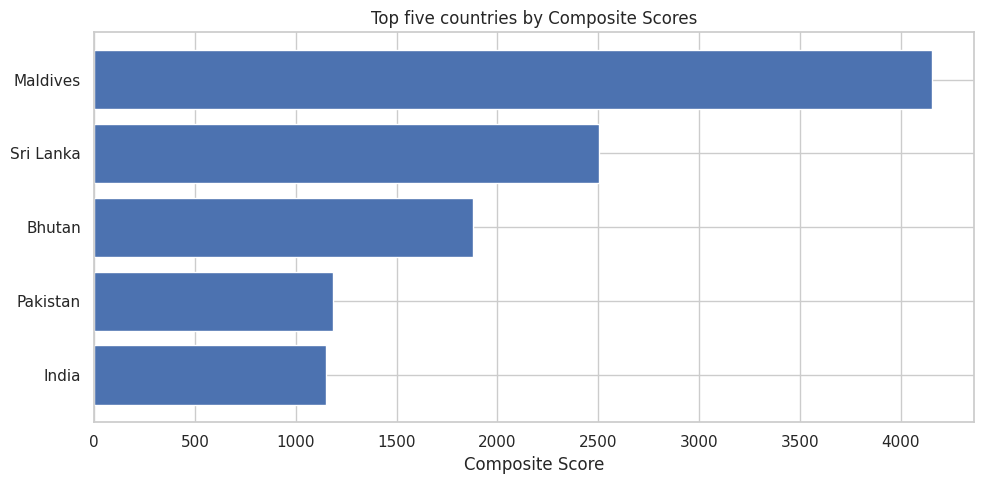

In [18]:
# Horizontal Bar Graph
plt.figure(figsize=(10, 5))

top_5 = country_means.head(5)
plt.barh(top_5.index, top_5.values)

plt.title('Top five countries by Composite Scores')
plt.xlabel('Composite Score')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Task 3

HDI outliers:
Empty DataFrame
Columns: [country, hdi]
Index: []

GNI outliers:
        country  gross_inc_percap
3511   Maldives       14543.14634
3512   Maldives       15287.20714
3514   Maldives       16391.40757
3515   Maldives       14162.42816
3516   Maldives       15423.81910
3517   Maldives       14050.92438
3518   Maldives       14363.23615
3519   Maldives       15300.31364
3520   Maldives       15355.44089
3521   Maldives       15648.36655
3522   Maldives       16410.16419
3523   Maldives       16414.93039
3524   Maldives       16911.45422
3525   Maldives       17474.64201
3526   Maldives       18055.72465
3527   Maldives       18679.92536
3529   Maldives       16857.60546
3530   Maldives       18846.79219
5473  Sri Lanka       13405.80369


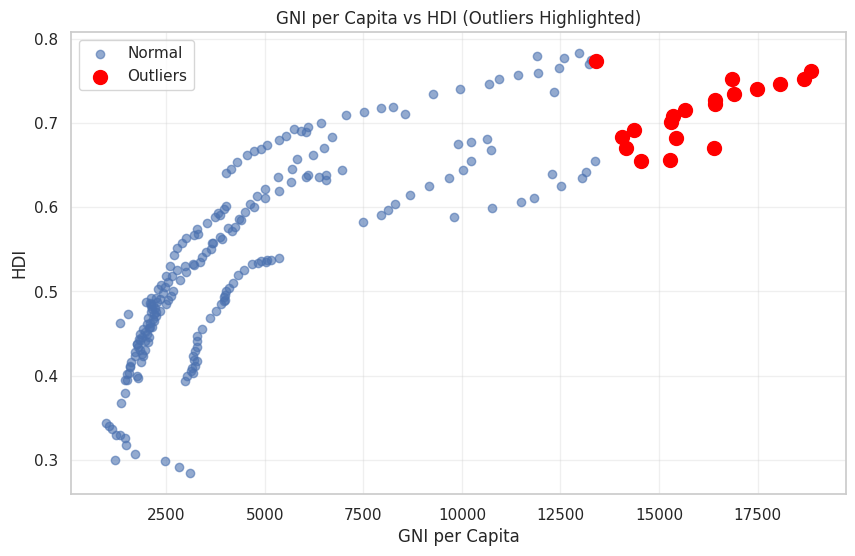

In [19]:
def find_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] < lower) | (data[col] > upper)]

# Find outliers
hdi_outliers = find_outliers(south_asia, 'hdi')
gni_outliers = find_outliers(south_asia, 'gross_inc_percap')

print("HDI outliers:")
print(hdi_outliers[['country', 'hdi']])

print("\nGNI outliers:")
print(gni_outliers[['country', 'gross_inc_percap']])

# Simple scatter plot
plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(south_asia['gross_inc_percap'], south_asia['hdi'], alpha=0.6, label='Normal')

# Highlight outliers
outliers = pd.concat([hdi_outliers, gni_outliers]).drop_duplicates()
plt.scatter(outliers['gross_inc_percap'], outliers['hdi'], color='red', s=100, label='Outliers')

plt.title('GNI per Capita vs HDI (Outliers Highlighted)')
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Task 4

HDI vs Life Expectancy: r = 0.959
HDI vs Gender Development: r = 0.866


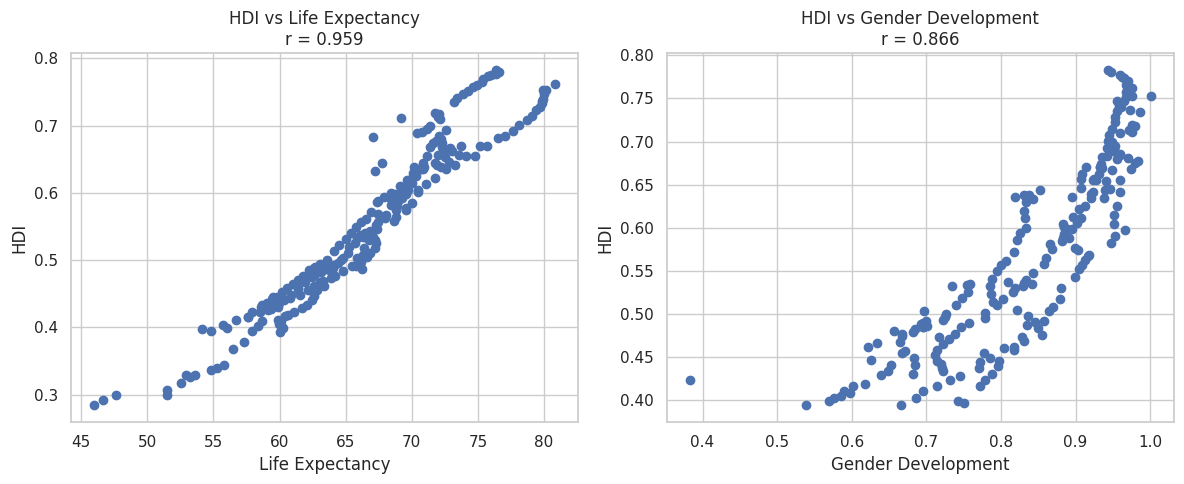

In [20]:

# Calculate correlations
corr1 = south_asia['hdi'].corr(south_asia['life_expectancy'])
corr2 = south_asia['hdi'].corr(south_asia['gender_development'])

print(f"HDI vs Life Expectancy: r = {corr1:.3f}")
print(f"HDI vs Gender Development: r = {corr2:.3f}")

# Create scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(south_asia['life_expectancy'], south_asia['hdi'])
ax1.set_title(f'HDI vs Life Expectancy\nr = {corr1:.3f}')
ax1.set_xlabel('Life Expectancy')
ax1.set_ylabel('HDI')

ax2.scatter(south_asia['gender_development'], south_asia['hdi'])
ax2.set_title(f'HDI vs Gender Development\nr = {corr2:.3f}')
ax2.set_xlabel('Gender Development')
ax2.set_ylabel('HDI')

plt.tight_layout()
plt.show()

Task 5

Positive gaps:
       country          Gap
3530  Maldives  18846.03019
3527  Maldives  18679.17236
3526  Maldives  18054.97765

Negative gaps:
        country          Gap
11  Afghanistan   980.789554
10  Afghanistan  1047.002686
9   Afghanistan  1121.985570


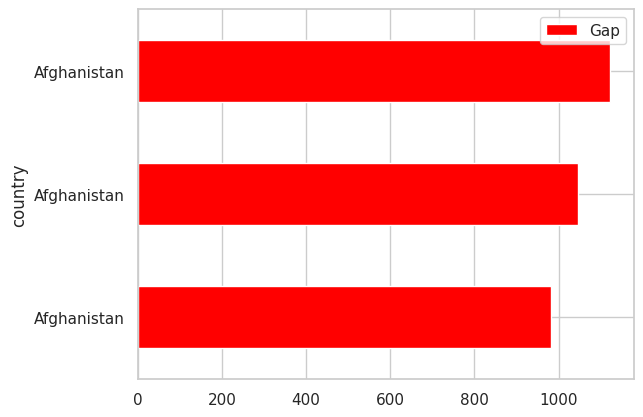

In [21]:
asia = south_asia.copy()
asia['Gap'] = asia['gross_inc_percap'] - asia['hdi']

print("Positive gaps:")
print(asia.sort_values('Gap', ascending=False)[['country', 'Gap']].head(3))

print("\nNegative gaps:")
print(asia.sort_values('Gap')[['country', 'Gap']].head(3))

asia.sort_values('Gap').head(3).plot.barh(x='country', y='Gap', color='red')
plt.show()

**Problem 3**

Task 1

In [22]:
import pandas as pd

# loading the main HDI dataset
df = pd.read_csv("HDI_problem1B.csv")

# define Middle East countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar","Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# filter dataset for Middle East
df_middle_east = df[df['country'].isin(middle_east_countries)]
df_south_asia = df[df['country'].isin(south_asia_countries)]

# save Middle East subset
df_middle_east.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)
df_south_asia.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)

print("Middle East and South Asia subset created and saved successfully!")


Middle East and South Asia subset created and saved successfully!


Task 2

In [23]:
print(f"South Asia HDI: Mean = {df_middle_east['hdi'].mean():.3f}, Std = {df_middle_east['hdi'].std():.3f}")
print(f"Middle East HDI: Mean = {df_south_asia['hdi'].mean():.3f}, Std = {df_south_asia['hdi'].std():.3f}")

South Asia HDI: Mean = 0.789, Std = 0.141
Middle East HDI: Mean = 0.640, Std = 0.098


South Asia performs better on Average than Middle East by .149.

Task 3

Top and bottom performers

In [24]:
sac_topthree = df_south_asia.nlargest(3, 'hdi')
sac_bottomthree = df_south_asia.nsmallest(3, 'hdi')

me_topthree = df_middle_east.nlargest(3, 'hdi')
me_bottomthree = df_middle_east.nsmallest(3, 'hdi')

print("South Asia Top 3:\n\n", sac_topthree[['country', 'hdi']].values,"\n")
print("South Asia Bottom 3:\n\n",sac_bottomthree[['country', 'hdi']].values,"\n")
print("Middle East Asia Top 3:\n\n", me_topthree[['country', 'hdi']].values,"\n")
print("Middle East Asia Bottom 3:\n\n", me_bottomthree[['country', 'hdi']].values,"\n")

South Asia Top 3:

 [['Sri Lanka' 0.783]
 ['Sri Lanka' 0.78]
 ['Sri Lanka' 0.777]] 

South Asia Bottom 3:

 [['Afghanistan' 0.462]
 ['Afghanistan' 0.473]
 ['Afghanistan' 0.488]] 

Middle East Asia Top 3:

 [['United Arab Emirates' 0.937]
 ['United Arab Emirates' 0.931]
 ['United Arab Emirates' 0.93]] 

Middle East Asia Bottom 3:

 [['Yemen' 0.424]
 ['Yemen' 0.425]
 ['Yemen' 0.43]] 



Bar Chart

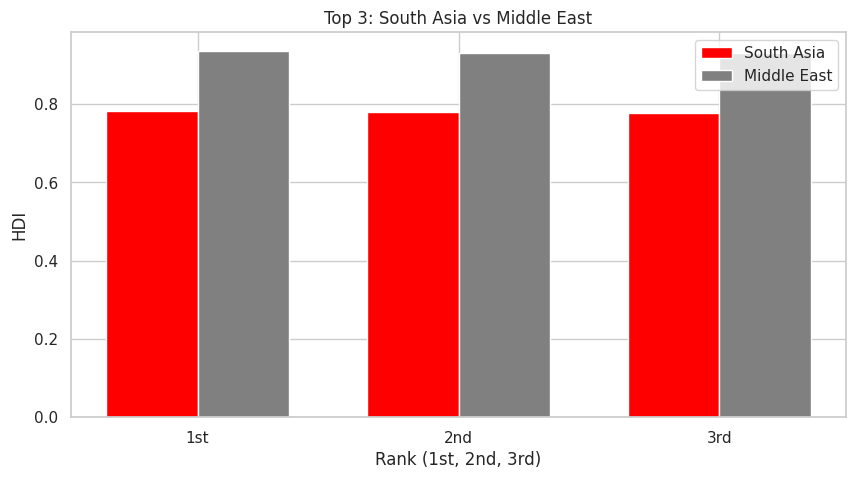

In [25]:
plt.figure(figsize=(10, 5))

# Get values
sac_top = df_south_asia.nlargest(3, 'hdi')['hdi'].values
me_top = df_middle_east.nlargest(3, 'hdi')['hdi'].values

# Plot
x = [0, 1, 2]
width = 0.35

plt.bar([i - width/2 for i in x], sac_top, width, label='South Asia', color='red')
plt.bar([i + width/2 for i in x], me_top, width, label='Middle East', color='gray')

plt.title('Top 3: South Asia vs Middle East')
plt.xlabel('Rank (1st, 2nd, 3rd)')
plt.ylabel('HDI')
plt.xticks(x, ['1st', '2nd', '3rd'])
plt.legend()
plt.grid(axis='y', alpha=1)
plt.show()

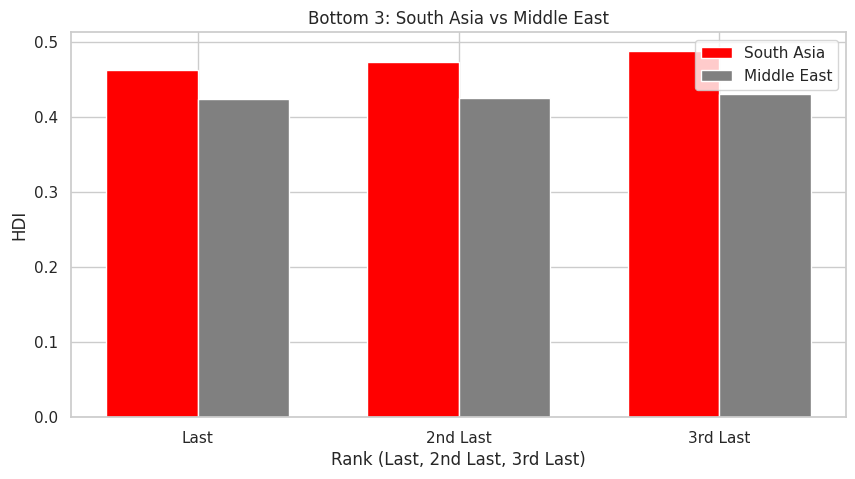

In [26]:
plt.figure(figsize=(10, 5))
# Get values
sac_bottom = df_south_asia.nsmallest(3, 'hdi')['hdi'].values
me_bottom = df_middle_east.nsmallest(3, 'hdi')['hdi'].values

# Plot
x = [0, 1, 2]
width = 0.35

plt.bar([i - width/2 for i in x], sac_bottom, width, label='South Asia', color='red')
plt.bar([i + width/2 for i in x], me_bottom, width, label='Middle East', color='gray')

plt.title('Bottom 3: South Asia vs Middle East')
plt.xlabel('Rank (Last, 2nd Last, 3rd Last)')
plt.ylabel('HDI')
plt.xticks(x, ['Last', '2nd Last', '3rd Last'])
plt.legend()
plt.grid(axis='y', alpha=1)
plt.show()

Task 4

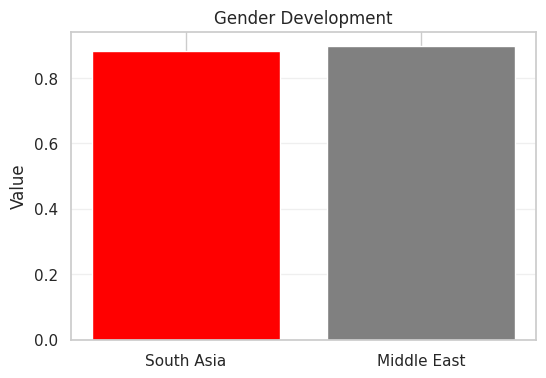

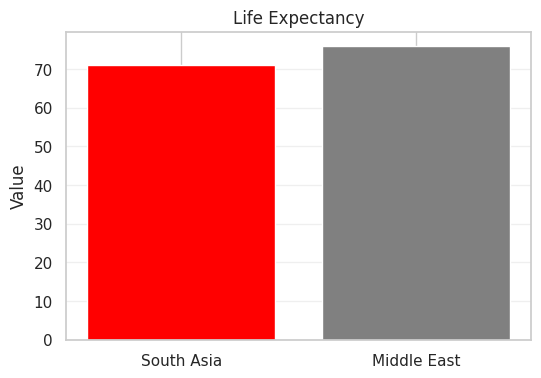

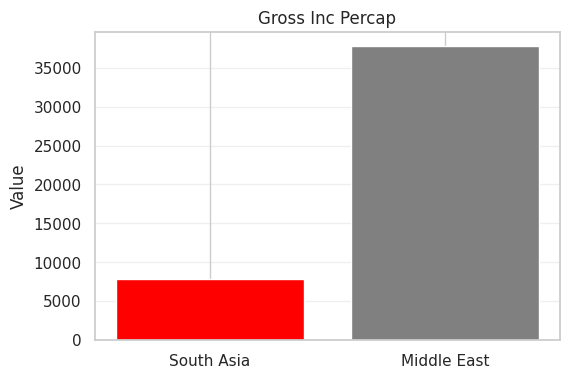

In [27]:
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

sac_metrics = df_south_asia[metrics].mean()  # South Asia averages
me_metrics = df_middle_east[metrics].mean()  # Middle East averages

metric_df = pd.DataFrame({
    'Metric': metrics,
    'South Asia': sac_metrics.values,
    'Middle East': me_metrics.values
})

metric_df = metric_df.melt(id_vars='Metric', var_name='Region', value_name='Value')

for metric in ['gender_development', 'life_expectancy', 'gross_inc_percap']:
    plt.figure(figsize=(6, 4))

    # Filter data
    data = metric_df[metric_df['Metric'] == metric]

    # Plot
    plt.bar(['South Asia', 'Middle East'], data['Value'], color=['red', 'gray'])
    plt.title(metric.replace('_', ' ').title())
    plt.ylabel('Value')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

Task 5

In [28]:

sac_range = df_south_asia['hdi'].max() - df_south_asia['hdi'].min()
me_range = df_middle_east['hdi'].max() - df_middle_east['hdi'].min()
sac_cv = df_south_asia['hdi'].std() / df_south_asia['hdi'].mean()
me_cv = df_middle_east['hdi'].std() / df_middle_east['hdi'].mean()
if sac_cv > me_cv:
    print("More variation: South Asia")
else:
    print("More variation: Middle East")

print(f"South Asia HDI CV: {sac_cv:.3f}")
print(f"Middle East HDI CV: {me_cv:.3f}")
print(f"South Asia HDI range: {sac_range:.3f}")
print(f"Middle East HDI range: {me_range:.3f}")

More variation: Middle East
South Asia HDI CV: 0.154
Middle East HDI CV: 0.179
South Asia HDI range: 0.321
Middle East HDI range: 0.513


South Asia Correlation with GDI: 0.874
South Asia Correlation with Life Expectancy Index: 0.939

Middle East Correlation with GDI: 0.936
Middle East Correlation with Life Expectancy Index: 0.933



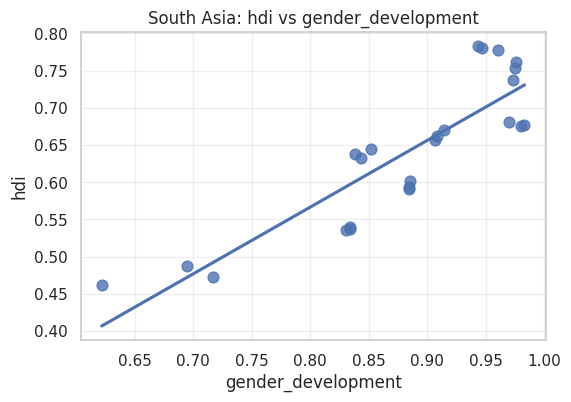

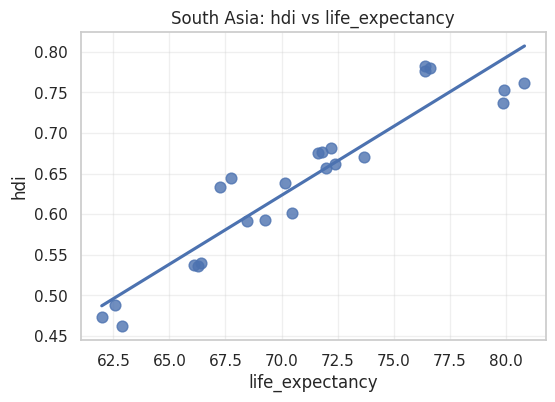

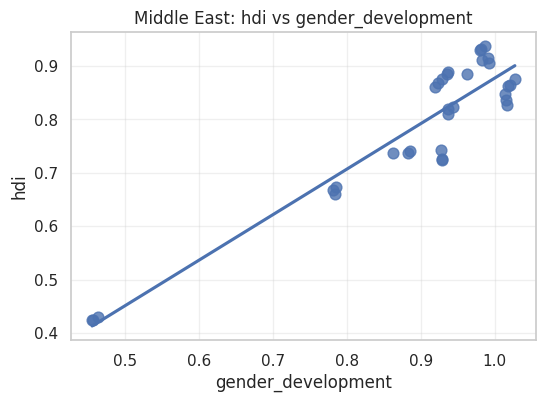

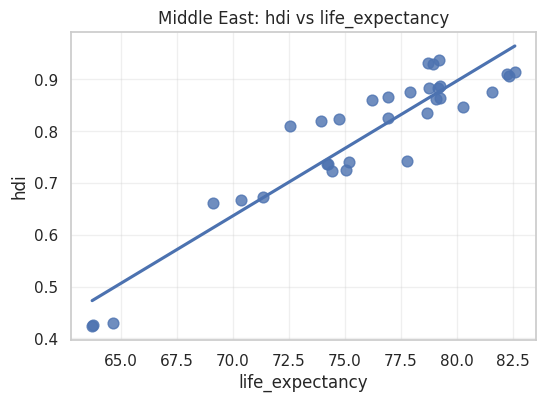

In [29]:

hdi_col = 'hdi'
gdi_col = 'gender_development'
lei_col = 'life_expectancy'

def compute_correlations(df, region_name):
    corr_gdi = df[hdi_col].corr(df[gdi_col])
    corr_lei = df[hdi_col].corr(df[lei_col])
    print(f"{region_name} Correlation with GDI: {corr_gdi:.3f}")
    print(f"{region_name} Correlation with Life Expectancy Index: {corr_lei:.3f}\n")
    return corr_gdi, corr_lei

compute_correlations(df_south_asia, "South Asia")
compute_correlations(df_middle_east, "Middle East")

def plot_scatter(df, x_col, y_col, region_name):
    plt.figure(figsize=(6, 4))
    sns.regplot(x=x_col, y=y_col, data=df, ci=None, scatter_kws={'s':60})
    plt.title(f'{region_name}: {y_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(alpha=0.3)
    plt.show()

# South Asia
plot_scatter(df_south_asia, gdi_col, hdi_col, "South Asia")
plot_scatter(df_south_asia, lei_col, hdi_col, "South Asia")

# Middle East
plot_scatter(df_middle_east, gdi_col, hdi_col, "Middle East")
plot_scatter(df_middle_east, lei_col, hdi_col, "Middle East")


Task 7

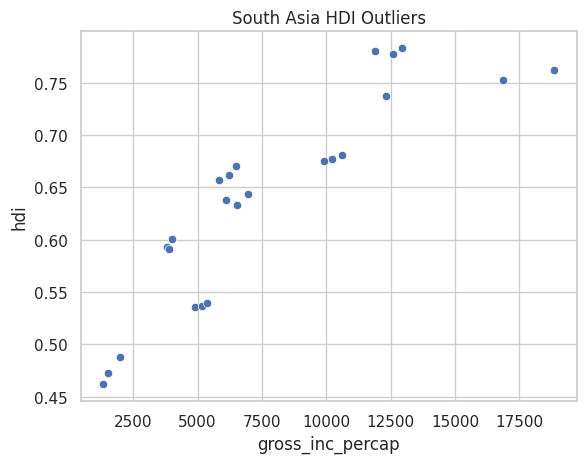

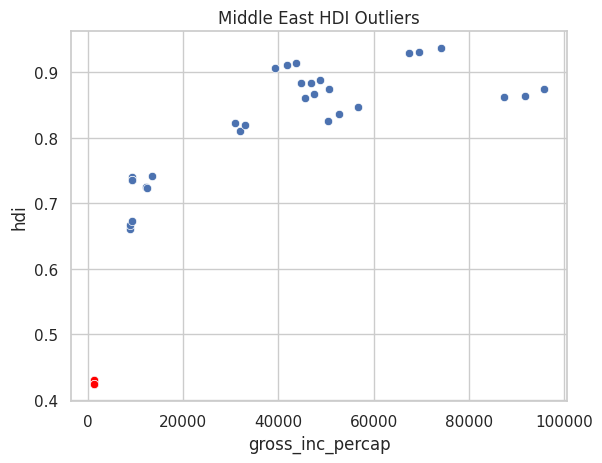

In [30]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1 - 1.5*IQR) | (df[column] > Q3 + 1.5*IQR)]

sa_outliers = detect_outliers(df_south_asia, 'hdi')
me_outliers = detect_outliers(df_middle_east, 'hdi')
sns.scatterplot(data=df_south_asia, x='gross_inc_percap', y='hdi')
sns.scatterplot(data=sa_outliers, x='gross_inc_percap', y='hdi', color='red')
plt.title("South Asia HDI Outliers")
plt.show()
sns.scatterplot(data=df_middle_east, x='gross_inc_percap', y='hdi')
sns.scatterplot(data=me_outliers, x='gross_inc_percap', y='hdi', color='red')
plt.title("Middle East HDI Outliers")
plt.show()